In [1]:
import numpy as np
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][:100].reshape(-1, 28*28).T
test_image = X_test[y_test == 2][0].reshape(28*28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


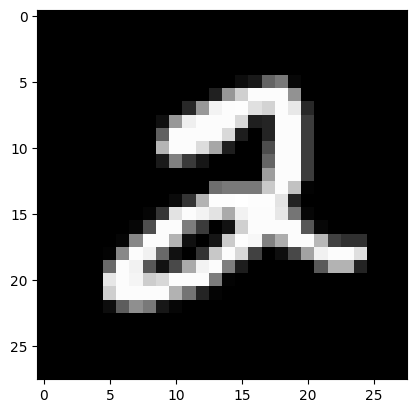

In [3]:
import matplotlib.pyplot as plt 
img = X[:,0].reshape(28,28)
plt.imshow(img, cmap='gray')

In [5]:
def center(X):
    return X - X.mean(axis = 1).reshape(-1, 1)

d, n = X.shape
X_prime = center(X)

In [6]:
def covariance(X):
    return X @ X.T / X.shape[1]

C = covariance(X_prime)

In [ ]:
def compute_pc(C):
    d = C.shape[0]
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    w1 , w2 = eigenvectors[:, -1], eigenvectors[:,-2]
    return w1, w2
# finding the two principal components

w1, w2 = compute_pc(C) 

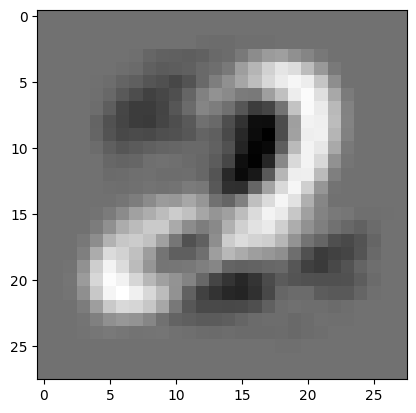

In [9]:
w1_image = w1.reshape(28, 28)
plt.imshow(w1_image, cmap = 'gray')

Text(0.5, 1.0, 'Variance covered = 95%')

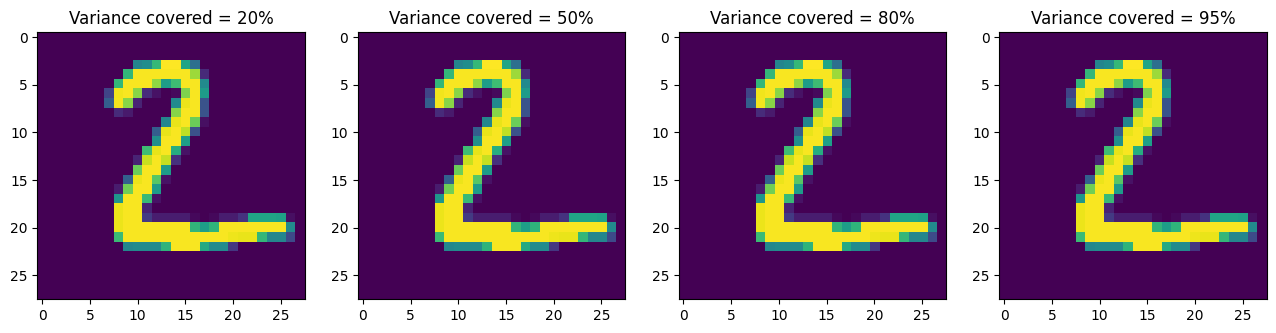

In [11]:
def reconstruct(C, test_image, thresh):
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    eigenvalues = list(reversed(eigenvalues))
    total = sum(eigenvalues)
    K = len(eigenvalues)
    for k in range(len(eigenvalues)):
        if sum(eigenvalues[:k+1]) / total >= thresh:
            k = k+1
            break
    W = eigenvectors[:, -K:]
    coefficient = test_image @ W
    return W @ coefficient

plt.figure(figsize = (20,20))
reconstruct_image = reconstruct(C, test_image, 0.20)
plt.subplot(1, 5, 1)
plt.imshow(reconstruct_image.reshape(28,28))
plt.title("Variance covered = 20%")



reconstruct_image = reconstruct(C, test_image, 0.50)
plt.subplot(1, 5, 2)
plt.imshow(reconstruct_image.reshape(28,28))
plt.title("Variance covered = 50%")


reconstruct_image = reconstruct(C, test_image, 0.80)
plt.subplot(1, 5, 3)
plt.imshow(reconstruct_image.reshape(28,28))
plt.title("Variance covered = 80%")


reconstruct_image = reconstruct(C, test_image, 0.95)
plt.subplot(1, 5, 4)
plt.imshow(reconstruct_image.reshape(28,28))
plt.title("Variance covered = 95%")